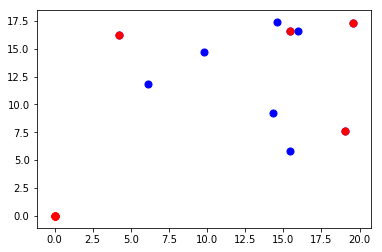

In [253]:
import numpy as np
import matplotlib.pyplot as plt
import math,time
import random 
import numpy.random as rd
from decimal import Decimal, ROUND_DOWN
from IPython import display

"""variable"""
N = 10 #nuber of individuals
W_dis = 0.8 #wight of distance
W_soc = 0.2 #weight of social affiliation
a = 0.1 #probabilty to chage state sponteniously
x1 = np.array(range(10))

"""initial condition"""
state = np.zeros(shape=(N,1)) ##iniitial state
depart = random.randint(0,9)  ## First departure
state[depart,0] = 1
kotaisu = np.array([])

"""function"""

def softmax(Z):
    """softmax fuction"""
    return np.exp(Z)/np.sum(np.exp(Z))

def pro(A,B,S):
    """compute probabtility to be next"""
    D = W_dis*A*S
    S = W_soc*B*S
    
    kekka = softmax(D+S+a)
    
    for i in range(10):
        p = np.sum(kekka[0:N,i])
        res_p[0,i] = p
    
    return res_p

"""social affiliation"""
xsoc = np.random.uniform(0,20,N)
ysoc = np.random.uniform(0,20,N)

res_soc = np.zeros(shape=(N,N))
for i in range(N):
    xsocial = xsoc-xsoc[i]
    ysocial = ysoc-ysoc[i]
    r_soc = (xsocial**2+ysocial**2)**0.5
    res_soc[i,0:N] = r_soc

for i in range(N):
    res_soc[i,i] = 0

"""distance"""
xpos = np.random.uniform(0,20,N)
ypos = np.random.uniform(0,20,N)
plt.scatter(xpos,ypos,c="blue")
plt.scatter(xpos[depart],ypos[depart],c="red")
plt.show()
res_dist = np.zeros(shape=(N,N))

for i in range(N):
    xdis = xpos-xpos[i]
    ydis = ypos-ypos[i]
    r_dis = (xdis**2+ydis**2)**0.5
    res_dist[i,0:N] = r_dis

"""simulation"""

for k in range(50):
    #time.sleep(0.1)
    
    res_p = np.zeros(shape=(1,N))
    pro(res_dist,res_soc,state)


    #plt.scatter(x1,res_p)
    #plt.show()

    res_p = res_p[0,:]
    x2 = rd.choice(N, 1, p=res_p)


    state[x2,0] = 1
    #print(state)
    
    xT = np.reshape(xpos,(10,1))
    yT = np.reshape(ypos,(10,1))
    xnew = xT*state
    ynew = yT*state
    
    plt.clf()
    plt.scatter(xpos,ypos,c="blue", s=50)
    plt.scatter(xnew,ynew,c="red", s=50)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    
    kazu = np.sum(state)
    kotaisu = np.append(kotaisu,kazu) 



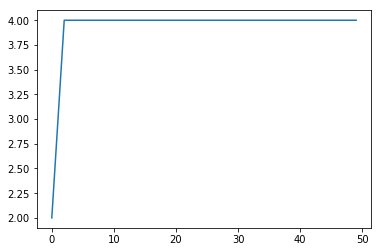

In [254]:
plt.plot(range(50),kotaisu)
plt.show()

In [173]:
W_dis = 0.5
W_soc = 0.5

D = W_dis*res_dist*state 
S = W_soc*res_soc*state

kekka = softmax(D+S+a)

res_p = np.zeros(shape=(1,N))
for i in range(10):
    p = np.sum(kekka[0:N,i])
    res_p[0,i] = p

plt.scatter(x1,res_p)


res_p = res_p[0,:]
x2 = rd.choice(N, 1, p=res_p)


state[x2,0] = 1
state

 



array([1.40404306e+01, 2.58264842e+00, 1.36076708e+01, 9.04228856e+00,
       1.96391211e+00, 8.89578437e+02, 4.96792158e+01, 8.54293091e-03,
       1.10821253e+01, 8.41472885e+00])